# TP4 Fréquence de la thématique par décennie - Sofia Valma-Rantisits

In [2]:
import collections
import os
import string
import sys

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Séparer les fichiers de chaque décennie

## Charger tous les  fichiers de la décennie `1850` et créer un fichier de texts

In [31]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_185')]
txts [:20]

['Bxl_1854_Tome_I1_Part_1.txt',
 'Bxl_1856_Tome_II1_Part_3.txt',
 'Bxl_1857_Tome_I1_Part_5.txt',
 'Bxl_1851_Tome_II1_Part_6.txt',
 'Bxl_1851_Tome_II1_Part_7.txt',
 'Bxl_1856_Tome_II1_Part_6.txt',
 'Bxl_1851_Tome_II1_Part_1.txt',
 'Bxl_1855_Tome_I1_Part_1.txt',
 'Bxl_1850_Tome_I1_Part_4.txt',
 'Bxl_1856_Tome_II1_Part_7.txt',
 'Bxl_1859_Tome_II1_Part_2.txt',
 'Bxl_1852_Tome_I1_Part_5.txt',
 'Bxl_1850_Tome_I1_Part_1.txt',
 'Bxl_1857_Tome_I1_Part_3.txt',
 'Bxl_1857_Tome_II1_Part_2.txt',
 'Bxl_1859_Tome_II1_Part_5.txt',
 'Bxl_1855_Tome_I1_Part_3.txt',
 'Bxl_1855_Tome_II1_Part_2.txt',
 'Bxl_1854_Tome_II1_Part_4.txt',
 'Bxl_1850_Tome_II1_Part_7.txt']

In [32]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [33]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

97

In [34]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'VILLE DE\n\nBULLETIN\nANNÉE\n\nP R E M I E R\n\n1854.\n\nS E M E S T R E\n\n\x0c\x0c\x0ch\n\ntombola\nhospice;\nentrées\nh Lay,:\nTixidenji\nà la « I\n\nUsé\n\nlu\n\n\x0cVILLE\n\nDE BRUXELLES.\n\nBULLETIN COMMUNAL\nA N N E E\n\nNUMÉRO\n\n1884.\n\n'

In [36]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1850s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [38]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1850s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"VILLE DE\n\nBULLETIN\nANNÉE\n\nP R E M I E R\n\n1854.\n\nS E M E S T R E\n\n\x0c\x0c\x0ch\n\ntombola\nhospice;\nentrées\nh Lay,:\nTixidenji\nà la « I\n\nUsé\n\nlu\n\n\x0cVILLE\n\nDE BRUXELLES.\n\nBULLETIN COMMUNAL\nA N N E E\n\nNUMÉRO\n\n1884.\n\n1.\n\nMARDI\n\nSéance du 7 Janvier\n\n1 0\n\nJANVIER.\n\n1854.\n\nPrésidence de 3 1 . C H A U L E S D E B R O U C K E R E ,\n\nBourgmestre.\n\n— Communication de pièces adressées au Conseil. — Ouverture d'une\ntombola au profit des pauvres. — Approbation d'actes de l'administration des\nhospices. - Modification au rè"

## Charger tous les  fichiers de la décennie `1860` et créer un fichier de texts

In [40]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts2 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_186')]
txts2 [:20]

['Bxl_1861_Tome_II1_Part_5.txt',
 'Bxl_1869_Tome_II1_Part_2.txt',
 'Bxl_1866_Tome_II1_Part_1.txt',
 'Bxl_1865_Tome_I1_Part_1.txt',
 'Bxl_1869_Tome_I2_Part_3.txt',
 'Bxl_1868_Tome_II1_Part_1.txt',
 'Bxl_1867_Tome_II1_Part_1.txt',
 'Bxl_1866_Tome_I1_Part_1.txt',
 'Bxl_1860_Tome_II1_Part_2.txt',
 'Bxl_1860_Tome_II1_Part_6.txt',
 'Bxl_1860_Tome_I1_Part_1.txt',
 'Bxl_1862_Tome_I1_Part_3.txt',
 'Bxl_1862_Tome_I1_Part_4.txt',
 'Bxl_1869_Tome_I1_Part_1.txt',
 'Bxl_1868_Tome_I1_Part_2.txt',
 'Bxl_1868_Tome_II1_Part_6.txt',
 'Bxl_1869_Tome_I1_Part_4.txt',
 'Bxl_1863_Tome_II1_Part_2.txt',
 'Bxl_1866_Tome_I1_Part_4.txt',
 'Bxl_1869_Tome_I1_Part_2.txt']

In [41]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts2:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [42]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

94

In [44]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'—\n\nVILLE\n\n31)0\n\nDE\n\n—\n\nBRUXELLES.\n\nBULLETIN COMMUNAL.\nANNÉE\n\nNUMÉRO 3 0 .\n\n1861.\n\nSAMEDI 14 DÉCEMBRE.\n\nCONSEIL COMMUNAL.\nSéance du 14 décembre 1861.\nP r é s i d e n c e de 3 1 . FONTAINAS,\n\nBourgmestr'

In [45]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1860s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [46]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1860s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"—\n\nVILLE\n\n31)0\n\nDE\n\n—\n\nBRUXELLES.\n\nBULLETIN COMMUNAL.\nANNÉE\n\nNUMÉRO 3 0 .\n\n1861.\n\nSAMEDI 14 DÉCEMBRE.\n\nCONSEIL COMMUNAL.\nSéance du 14 décembre 1861.\nP r é s i d e n c e de 3 1 . FONTAINAS,\n\nBourgmestre.\n\nSOMMAIRE. — Décision relative au déplacement du marché aux légumes, établi au\nPont-d'Or, et du marché aux fourrages. — Autorisation donnée au Collège de\nfaire l'acquisition d'un terrain pour l'agrandissement du cimetière de la ville.\n— Rapport fait par M . De Meure, au sujet de la fixation des p"

## Charger tous les  fichiers de la décennie `1870` et créer un fichier de texts

In [47]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts3 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_187')]
txts3 [:20]

['Bxl_1871_Tome_I1_Part_3.txt',
 'Bxl_1877_Tome_II1_Part_6.txt',
 'Bxl_1879_Tome_II1_Part_1.txt',
 'Bxl_1871_Tome_II1_Part_1.txt',
 'Bxl_1870_Tome_I1_Part_1.txt',
 'Bxl_1876_Tome_I1_Part_1.txt',
 'Bxl_1870_Tome_I1_Part_2.txt',
 'Bxl_1878_Tome_II1_Part_1.txt',
 'Bxl_1871_Tome_I1_Part_2.txt',
 'Bxl_1878_Tome_II1_Part_3.txt',
 'Bxl_1876_Tome_I1_Part_4.txt',
 'Bxl_1879_Tome_II1_Part_9.txt',
 'Bxl_1870_Tome_II1_Part_4.txt',
 'Bxl_1872_Tome_II1_Part_3.txt',
 'Bxl_1878_Tome_II1_Part_5.txt',
 'Bxl_1871_Tome_I1_Part_1.txt',
 'Bxl_1870_Tome_II1_Part_6.txt',
 'Bxl_1871_Tome_II1_Part_6.txt',
 'Bxl_1877_Tome_II1_Part_7.txt',
 'Bxl_1876_Tome_II1_Part_5.txt']

In [48]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts3:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [49]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

95

In [50]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'—\n\nVILLE\n\nD E\n\nBULLETIN\n\n201 —\n\nB R U X E L L E S .\n\nCOMMUNAL.\n\nANNÉE\n\n1871.\n\nN U M É R O 4.\n\nLUNDI 17\n\nCONSEIL\n\nAVRIL.\n\nCOMMUNAL.\n\nCOMITÉ SECRET DU 6 MARS 1 8 7 1 .\n\nLe Conseil a nommé M . Emile Lhoe'

In [51]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1870s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [52]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1870s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"—\n\nVILLE\n\nD E\n\nBULLETIN\n\n201 —\n\nB R U X E L L E S .\n\nCOMMUNAL.\n\nANNÉE\n\n1871.\n\nN U M É R O 4.\n\nLUNDI 17\n\nCONSEIL\n\nAVRIL.\n\nCOMMUNAL.\n\nCOMITÉ SECRET DU 6 MARS 1 8 7 1 .\n\nLe Conseil a nommé M . Emile Lhoest sténographe de la Ville.\nIl a délégué M . l'Echevin Couteaux pour représenter la Ville auprès de\nla Société royale de Zoologie.\nIl a nommé administrateurs des Hospices et de la Bienfaisance :\nM M . Charles Thiéfry et Jean de Bongé.\nIl a adopté les modifications proposées au règlement organique du"

## Charger tous les  fichiers de la décennie `1880` et créer un fichier de texts

In [53]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts4 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_188')]
txts4 [:20]

['Bxl_1882_Tome_I2_Part_12.txt',
 'Bxl_1889_Tome_I2_Part_3.txt',
 'Bxl_1880_Tome_I1_Part_8.txt',
 'Bxl_1881_Tome_I2_Part_9.txt',
 'Bxl_1883_Tome_I1_Part_6.txt',
 'Bxl_1885_Tome_I2_Part_4.txt',
 'Bxl_1881_Tome_I2_Part_11.txt',
 'Bxl_1885_Tome_I2_Part_12.txt',
 'Bxl_1885_Tome_I1_Part_3.txt',
 'Bxl_1887_Tome_I1_Part_6.txt',
 'Bxl_1883_Tome_I2_Part_7.txt',
 'Bxl_1886_Tome_I1_Part_6.txt',
 'Bxl_1886_Tome_I2_Part_6.txt',
 'Bxl_1886_Tome_I2_Part_1.txt',
 'Bxl_1889_Tome_I1_Part_2.txt',
 'Bxl_1882_Tome_I1_Part_1.txt',
 'Bxl_1882_Tome_I2_Part_5.txt',
 'Bxl_1889_Tome_I2_Part_4.txt',
 'Bxl_1881_Tome_I1_Part_4.txt',
 'Bxl_1881_Tome_I1_Part_8.txt']

In [54]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts4:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [55]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

190

In [56]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'Art. 74. — Subside à VAthénée royal : 82,000 francs.\nCette somme représente la part incombant à ia Ville dans\nle traitement des professeurs, ainsi que le montant des\nmenues dépenses.\nLe budget présent'

In [57]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1880s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [58]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1880s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"Art. 74. — Subside à VAthénée royal : 82,000 francs.\nCette somme représente la part incombant à ia Ville dans\nle traitement des professeurs, ainsi que le montant des\nmenues dépenses.\nLe budget présenté par la Commission administrative\nainsi que le compte justifiant l'emploi de ces fonds, sont\nannuellement soumis à l'approbation du Conseil communal.\nArt. 75. — loyer de locaux, entretien, contributions et assurance :\n29,750 francs.\nLoyer des locaux de la section professionnelle de 1 Athénée, rue d"

## Charger tous les  fichiers de la décennie `1890` et créer un fichier de texts

In [59]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts5 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_189')]
txts5 [:20]

['Bxl_1891_Tome_I1_Part_1.txt',
 'Bxl_1896_Tome_I2_1_Part_1.txt',
 'Bxl_1899_Tome_I1_Part_3.txt',
 'Bxl_1891_Tome_I1_Part_6.txt',
 'Bxl_1890_Tome_I2_Part_4.txt',
 'Bxl_1896_Tome_I1_2_Part_5.txt',
 'Bxl_1891_Tome_I1_Part_5.txt',
 'Bxl_1898_Tome_I1_Part_12.txt',
 'Bxl_1891_Tome_I2_Part_4.txt',
 'Bxl_1892_Tome_I2_Part_1.txt',
 'Bxl_1895_Tome_I1_Part_1.txt',
 'Bxl_1899_Tome_I2_Part_12.txt',
 'Bxl_1896_Tome_I1_2_Part_6.txt',
 'Bxl_1898_Tome_I1_Part_3.txt',
 'Bxl_1892_Tome_I2_Part_8.txt',
 'Bxl_1890_Tome_I1_Part_3.txt',
 'Bxl_1892_Tome_I1_Part_6.txt',
 'Bxl_1893_Tome_I1_Part_7.txt',
 'Bxl_1894_Tome_I1_Part_4.txt',
 'Bxl_1890_Tome_I1_Part_8.txt']

In [60]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts5:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [61]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

200

In [62]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'VILLE\n\nDE\n\nJLLETIN\n\nBRUXELLES.\n\nCOMMUNAL\n\nANNÉE\n\nPREMIERE\n\n1891.\n\nPARTIE.\n\nTOME I .\n\nCOMPTE\n\nRENDU\n\nDES\n\nSÉANCES.\n\nBRUXELLES,\n1MPR1MEH1E D E V\n\nV E\n\nJULIEN\n\nBAE&TSOE, S U C .\n\n1891\n\nDE\n\nBOLS-WITTOUCK.'

In [63]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1890s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [64]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1890s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

'VILLE\n\nDE\n\nJLLETIN\n\nBRUXELLES.\n\nCOMMUNAL\n\nANNÉE\n\nPREMIERE\n\n1891.\n\nPARTIE.\n\nTOME I .\n\nCOMPTE\n\nRENDU\n\nDES\n\nSÉANCES.\n\nBRUXELLES,\n1MPR1MEH1E D E V\n\nV E\n\nJULIEN\n\nBAE&TSOE, S U C .\n\n1891\n\nDE\n\nBOLS-WITTOUCK.\n\n\x0c\x0cN°\n\n1.\n\nCOMPTE R E N D U D E L A S É A N C E\n\nD U 1" J A N V I E R\n\n4891.\n\nVILLE DE B R U X E L L E S .\n\nBULLETIN\n\nCOMMUNAL\n\nA N N É E\n\nCONSEIL\n\nCOMMUNAL.\n\nSéance du 1\nPrésidence\n\n1891.\n\ne r\n\nJanvier 1 8 9 1 .\n\nde M . B U L S ,\n\nBourgmestre.\n\nSOMMAIEB :\n\n1.\n2.\n3.\n4.\n5.\n\nPrestation de serment des'

## Charger tous les  fichiers de la décennie `1900` et créer un fichier de texts

In [65]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts6 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_190')]
txts6 [:20]

['Bxl_1909_Tome_I2_1_Part_5.txt',
 'Bxl_1903_Tome_I2_2_Part_2.txt',
 'Bxl_1904_Tome_I2_Part_1.txt',
 'Bxl_1900_Tome_I2_Part_8.txt',
 'Bxl_1906_Tome_II1_Part_1.txt',
 'Bxl_1903_Tome_I2_1_Part_9.txt',
 'Bxl_1904_Tome_I2_Part_17.txt',
 'Bxl_1904_Tome_I2_Part_2.txt',
 'Bxl_1902_Tome_I2_2_Part_8.txt',
 'Bxl_1900_Tome_I2_Part_3.txt',
 'Bxl_1903_Tome_I1_Part_3.txt',
 'Bxl_1902_Tome_I1_Part_6.txt',
 'Bxl_1906_Tome_I1_Part_13.txt',
 'Bxl_1902_Tome_I2_2_Part_5.txt',
 'Bxl_1905_Tome_I2_Part_13.txt',
 'Bxl_1908_Tome_I1_Part_1.txt',
 'Bxl_1902_Tome_I1_Part_5.txt',
 'Bxl_1907_Tome_II1_Part_1.txt',
 'Bxl_1902_Tome_II1_Part_2.txt',
 'Bxl_1909_Tome_I2_2_Part_3.txt']

In [66]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts6:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [67]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

223

In [68]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"Produit du droit de fréquent\nPUBLICS\n\n142\n\n4869\n\nP u p i t r e s de l i q u i d a t i o n\n\n»\n\nNOMBF\n\ndes\nredevances\n\nNombre\n\nMONTANT\nTOTAL\n\nde porteurs\nde dépêches\n\nde\ndélégués\n\nd'agents\nde change\n\n18"

In [69]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1900s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [70]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1900s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

'Produit du droit de fréquent\nPUBLICS\n\n142\n\n4869\n\nP u p i t r e s de l i q u i d a t i o n\n\n»\n\nNOMBF\n\ndes\nredevances\n\nNombre\n\nMONTANT\nTOTAL\n\nde porteurs\nde dépêches\n\nde\ndélégués\n\nd\'agents\nde change\n\n1868\n\nB O U R S E At\n\nC ai\nC "\n\nMONTANT\n\nsg\na S\n\nd\'entrées\n?n m o y e n n e\n(par jour)\n\nD E SFONDS\n\nNOMBRE\nde\nbanquiers\n\nANNÉES\n\nBOURSE\n\n142\n\n5,600\n\n»\n\n428\n\n128\n\n6,400\n\n»\n\n>\n\n*\n\n4870\n\n445\n\n445\n\n7,250\n\n»\n\n•\n\n»\n\n»\n\n4874\n\n4 66\n\n466\n\n8,300\n\n»\n\n»\n\nS\n\n»\n\n»\n\n202\n\n40,400\n\n»\n\n>\n\n>\n\n»\n\n»\n\n245\n\n55,350\n\n>•\n\n370\n\n'

## Charger tous les  fichiers de la décennie `1910` et créer un fichier de texts

In [71]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts7 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_191')]
txts7 [:20]

['Bxl_1910_Tome_I1_Part_2.txt',
 'Bxl_1911_Tome_I2_2_Part_9.txt',
 'Bxl_1910_Tome_I1_Part_1.txt',
 'Bxl_1911_Tome_I2_1_Part_5.txt',
 'Bxl_1910_Tome_I2_1_Part_12.txt',
 'Bxl_1919_Tome_I2_2_Part_5.txt',
 'Bxl_1910_Tome_I2_1_Part_5.txt',
 'Bxl_1911_Tome_I2_2_Part_11.txt',
 'Bxl_1912_Tome_I2_1_Part_7.txt',
 'Bxl_1913_Tome_I2_2_Part_1.txt',
 'Bxl_1911_Tome_I2_1_Part_10.txt',
 'Bxl_1915_Tome_II1_Part_3.txt',
 'Bxl_1912_Tome_I1_2_Part_7.txt',
 'Bxl_1913_Tome_I2_1_Part_7.txt',
 'Bxl_1911_Tome_I1_Part_2.txt',
 'Bxl_1910_Tome_I2_1_Part_4.txt',
 'Bxl_1919_Tome_I2_2_Part_3.txt',
 'Bxl_1913_Tome_I2_2_Part_7.txt',
 'Bxl_1911_Tome_I1_Part_10.txt',
 'Bxl_1912_Tome_I2_2_Part_5.txt']

In [72]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts7:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [73]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

170

In [74]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"(31\n\nJanvier\n\n1910)\n\n—\n\n100\n\n—\n\nCes comptes soldent par un déficit de. . . fr.\nalors que la somme prévue au bu iget de la Ville\nn'est que de\nDifférence.\n\n626.568 90\n532,970 37\n\n. fr.\n\n93,598 53\n\nEn vu"

In [75]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1910s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [76]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1910s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"(31\n\nJanvier\n\n1910)\n\n—\n\n100\n\n—\n\nCes comptes soldent par un déficit de. . . fr.\nalors que la somme prévue au bu iget de la Ville\nn'est que de\nDifférence.\n\n626.568 90\n532,970 37\n\n. fr.\n\n93,598 53\n\nEn vue de permettre de liquider le montant de ce déficit, le\nCollège vous propose, Messieurs, le vote d'un crédit supplémentaire defr. 9;5,598-ô3 à l'art. 131 des dépenses ordinaires\ndu budget de 1901) : « Subside éventuel à\nl'Administration\ndes hospices et secours ».\n\nLes ressources ordinaires de l'exer"

## Charger tous les  fichiers de la décennie `1920` et créer un fichier de texts

In [77]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts8 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_192')]
txts8 [:20]

['Bxl_1929_Tome_I_Part_9.txt',
 'Bxl_1925_Tome_II1_1_Part_6.txt',
 'Bxl_1920_Tome_I2_Part_4.txt',
 'Bxl_1925_Tome_II1_1_Part_5.txt',
 'Bxl_1926_Tome_I1_Part_2.txt',
 'Bxl_1920_Tome_I2_Part_16.txt',
 'Bxl_1925_Tome_II1_1_Part_7.txt',
 'Bxl_1928_Tome_II1_Part_6.txt',
 'Bxl_1926_Tome_II1_Part_10.txt',
 'Bxl_1925_Tome_II1_2_Part_2.txt',
 'Bxl_1928_Tome_II1_Part_12.txt',
 'Bxl_1926_Tome_I2_Part_8.txt',
 'Bxl_1927_Tome_I_Part_5.txt',
 'Bxl_1929_Tome_I_Part_4.txt',
 'Bxl_1924_Tome_I1_Part_7.txt',
 'Bxl_1926_Tome_I2_Part_6.txt',
 'Bxl_1923_Tome_I1_Part_5.txt',
 'Bxl_1928_Tome_II1_Part_2.txt',
 'Bxl_1929_Tome_II2_Part_2.txt',
 'Bxl_1926_Tome_I1_Part_8.txt']

In [72]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [73]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

170

In [74]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"(31\n\nJanvier\n\n1910)\n\n—\n\n100\n\n—\n\nCes comptes soldent par un déficit de. . . fr.\nalors que la somme prévue au bu iget de la Ville\nn'est que de\nDifférence.\n\n626.568 90\n532,970 37\n\n. fr.\n\n93,598 53\n\nEn vu"

In [78]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1920s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [79]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1920s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"(31\n\nJanvier\n\n1910)\n\n—\n\n100\n\n—\n\nCes comptes soldent par un déficit de. . . fr.\nalors que la somme prévue au bu iget de la Ville\nn'est que de\nDifférence.\n\n626.568 90\n532,970 37\n\n. fr.\n\n93,598 53\n\nEn vue de permettre de liquider le montant de ce déficit, le\nCollège vous propose, Messieurs, le vote d'un crédit supplémentaire defr. 9;5,598-ô3 à l'art. 131 des dépenses ordinaires\ndu budget de 1901) : « Subside éventuel à\nl'Administration\ndes hospices et secours ».\n\nLes ressources ordinaires de l'exer"

## Charger tous les  fichiers de la décennie `1930` et créer un fichier de texts

In [86]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts9 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_193')]
txts9 [:20]

['Bxl_1935_Tome_II_Part_6.txt',
 'Bxl_1930_Tome_II2_Part_4.txt',
 'Bxl_1930_Tome_I_Part_7.txt',
 'Bxl_1935_Tome_II_Part_8.txt',
 'Bxl_1931_Tome_I_Part_3.txt',
 'Bxl_1935_Tome_I_Part_4.txt',
 'Bxl_1932_Tome_II2_Part_9.txt',
 'Bxl_1936_Tome_I2_Part_3.txt',
 'Bxl_1936_Tome_I_Part_4.txt',
 'Bxl_1937_Tome_II2_Part_2.txt',
 'Bxl_1938_Tome_II_Part_6.txt',
 'Bxl_1932_Tome_I_Part_5.txt',
 'Bxl_1932_Tome_II2_Part_6.txt',
 'Bxl_1938_Tome_II_Part_8.txt',
 'Bxl_1932_Tome_I_Part_9.txt',
 'Bxl_1932_Tome_II2_Part_7.txt',
 'Bxl_1939_Tome_III_Part_4.txt',
 'Bxl_1931_Tome_II2_Part_1.txt',
 'Bxl_1937_Tome_I_Part_6.txt',
 'Bxl_1932_Tome_II2_Part_8.txt']

In [81]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts9:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [82]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

206

In [83]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"d'après\n\ndes feux par\n\nles postes arrivés\n\na\n\ncatégories\n\nd'étages,\n\nles premiers sur\nliTAGES\n\nKl)\n\n<D\n\nin\n\nX\n\nS\n\no\n\nM\n\ned\n\nlieux.\n\n(D\n\n09\n\nPOSTES\n\nles\n\ngroupé,\n\na\n\nO\n\no\n\n(73\n0Í\nSW\n\n- I-H\n\nw\nEH\n\nVoies"

In [84]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1930s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [85]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1930s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

'd\'après\n\ndes feux par\n\nles postes arrivés\n\na\n\ncatégories\n\nd\'étages,\n\nles premiers sur\nliTAGES\n\nKl)\n\n<D\n\nin\n\nX\n\nS\n\no\n\nM\n\ned\n\nlieux.\n\n(D\n\n09\n\nPOSTES\n\nles\n\ngroupé,\n\na\n\nO\n\no\n\n(73\n0Í\nSW\n\n- I-H\n\nw\nEH\n\nVoies pul\nang\n\nnumérique\n\noitu\n\nÉTAT\n\nX\n\nC\n\nO\n"-(.\n\n33\n\nH\n\nri\n-—H\n\nEn\n\n36\n\n9 6\n\n»\n\n9\n\n13 28\n\n5 26\n\n»\n\n15\n\n25\n\n14\n\n» 6\n\n»\n\n9\n\n1\n\n156\n\n5* Division\n\n.\n\n.\n\n.\n\n.\n\n2 4 » 3\n14\n\n3 » » 2 5 3\n\n4\n\n»\n\n»\n\n»\n\n2\n\n6\'\n\nid.\n\n22\n\n3\n\n7\n\n#\n\nid\n\n49\n\n5 6 9\n\n1 6 1 5 1 1 »\n\na\n\nid\n\n14\n\n2 1 3\n\n» 4\n\nid\n\n»\n\n1\n\n»\n\n32\n\n9\n\n1 5\n\n»\n\n2\n\n1'

## Charger tous les  fichiers de la décennie `1940` et créer un fichier de texts

In [87]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts10 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_194')]
txts10 [:20]

['Bxl_1948_Tome_II_Part_9.txt',
 'Bxl_1949_Tome_II_Part_12.txt',
 'Bxl_1946_Tome_II_Part_12.txt',
 'Bxl_1946_Tome_II_Part_7.txt',
 'Bxl_1946_Tome_I_Part_1.txt',
 'Bxl_1949_Tome_II_Part_5.txt',
 'Bxl_1948_Tome_II_Part_3.txt',
 'Bxl_1946_Tome_I_Part_7.txt',
 'Bxl_1946_Tome_I_Part_3.txt',
 'Bxl_1948_Tome_I_Part_9.txt',
 'Bxl_1949_Tome_II_Part_13.txt',
 'Bxl_1949_Tome_I_Part_5.txt',
 'Bxl_1945_Tome_II2_Part_2.txt',
 'Bxl_1949_Tome_II_Part_2.txt',
 'Bxl_1949_Tome_I_Part_1.txt',
 'Bxl_1947_Tome_II_Part_1.txt',
 'Bxl_1945_Tome_II1_Part_1.txt',
 'Bxl_1948_Tome_II_Part_6.txt',
 'Bxl_1947_Tome_I_Part_4.txt',
 'Bxl_1945_Tome_II1_Part_9.txt']

In [88]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts10:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [89]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

102

In [90]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"—\n\n1527 —\n\n(22 novembre\n\n19$)\n\n1\nSapeurs-Pompiers. — Convention avec la commune\nWaterloo pour les secours en cas d'accidents\nd'incendie.\n\nde\net\n\n. M . le Bourgmestre propose, a u n o m d u C o l l è g"

In [91]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1940s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [92]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1940s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"—\n\n1527 —\n\n(22 novembre\n\n19$)\n\n1\nSapeurs-Pompiers. — Convention avec la commune\nWaterloo pour les secours en cas d'accidents\nd'incendie.\n\nde\net\n\n. M . le Bourgmestre propose, a u n o m d u C o l l è g e , d'approuver u n e c o n v e n t i o n à c o n c l u r e avec l a C o m m u n e de\nW a t e r l o o p o u r l ' o r g a n i s a t i o n des secours e n cas d ' a c c i dent et d'incendie sur le territoire de cette d e r n i è r e c o m mune. (1)\n— Il est p r o c é d é a u vote p a r appel n o m i"

## Charger tous les  fichiers de la décennie `1950` et créer un fichier de texts

In [93]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts11 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_195')]
txts11 [:20]

['Bxl_1955_Tome_II1_Part_8.txt',
 'Bxl_1950_Tome_II_Part_2.txt',
 'Bxl_1955_Tome_II2_Part_7.txt',
 'Bxl_1958_Tome_II_Part_12.txt',
 'Bxl_1958_Tome_II_Part_15.txt',
 'Bxl_1951_Tome_I_Part_5.txt',
 'Bxl_1952_Tome_II_Part_6.txt',
 'Bxl_1958_Tome_I_Part_7.txt',
 'Bxl_1955_Tome_I_Part_8.txt',
 'Bxl_1951_Tome_II_Part_13.txt',
 'Bxl_1957_Tome_II2_Part_5.txt',
 'Bxl_1955_Tome_II2_Part_3.txt',
 'Bxl_1958_Tome_I_Part_6.txt',
 'Bxl_1959_Tome_II1_Part_1.txt',
 'Bxl_1956_Tome_I_Part_5.txt',
 'Bxl_1951_Tome_II_Part_15.txt',
 'Bxl_1951_Tome_II_Part_5.txt',
 'Bxl_1956_Tome_II1_Part_11.txt',
 'Bxl_1954_Tome_III_Part_7.txt',
 'Bxl_1953_Tome_III_Part_8.txt']

In [94]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts11:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [95]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

312

In [96]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'—\n\n691\n\n—\n\n(3\n\noctobre\n\n1955)\n\nReport : 153.887.574,77\n\nDirection —\n\nAdministration —\n\nTraitements\nSalaires\nEntretien\nFrais généraux\nAmortissements\nIntérêts s u r e m p r u n t s\n\nMagasins g é n é r a'

In [97]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1950s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [98]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1950s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"—\n\n691\n\n—\n\n(3\n\noctobre\n\n1955)\n\nReport : 153.887.574,77\n\nDirection —\n\nAdministration —\n\nTraitements\nSalaires\nEntretien\nFrais généraux\nAmortissements\nIntérêts s u r e m p r u n t s\n\nMagasins g é n é r a u x .\n2.213.316,—\n2.807.067,82\n324.499,24\n1.289.179,78\n\n.\n\n.\n\n.\n\n431.446,67\n25.314,58\n\n456.761,25\n7.090.824,09\n\nD é p e n s e s hors exploitation.\nP e n s i o n s c o m m u n a l e s et ouvrières d u S e r v i c e\nT r a v a u x et f o u r n i t u r e s p o u r d'autres s e r v i c e s\nInspection d "

## Charger tous les  fichiers de la décennie `1960` et créer un fichier de texts

In [99]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts12 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_196')]
txts12 [:20]

['Bxl_1961_Tome_RptAn_Part_4.txt',
 'Bxl_1963_Tome_RptAn_Part_5.txt',
 'Bxl_1966_Tome_I2_Part_5.txt',
 'Bxl_1967_Tome_II2_Part_10.txt',
 'Bxl_1965_Tome_I_Part_8.txt',
 'Bxl_1966_Tome_II2_Part_11.txt',
 'Bxl_1963_Tome_II1_Part_6.txt',
 'Bxl_1967_Tome_I1_Part_7.txt',
 'Bxl_1966_Tome_I2_Part_7.txt',
 'Bxl_1961_Tome_I_Part_4.txt',
 'Bxl_1965_Tome_II2_Part_10.txt',
 'Bxl_1962_Tome_II2_Part_5.txt',
 'Bxl_1968_Tome_II2_Part_8.txt',
 'Bxl_1965_Tome_I_Part_4.txt',
 'Bxl_1964_Tome_II2_Part_9.txt',
 'Bxl_1965_Tome_II1_Part_2.txt',
 'Bxl_1964_Tome_II2_Part_4.txt',
 'Bxl_1969_Tome_I1_Part_7.txt',
 'Bxl_1969_Tome_I1_Part_8.txt',
 'Bxl_1969_Tome_I2_Part_3.txt']

In [100]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts12:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [101]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

420

In [102]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"—\n\n301\n\n—\n\n5. — S e r v i c e a d m i n i s t r a t i f\n51. —\n\nADMINISTRATION.\n\nD u r a n t l'année 1960, i l a été procédé\n1 3 . 3 9 9 pièces à l ' i n d i c a t e u r .\n\nà l'inscription de\n\ni l a ét"

In [103]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1960s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [104]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1960s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"—\n\n301\n\n—\n\n5. — S e r v i c e a d m i n i s t r a t i f\n51. —\n\nADMINISTRATION.\n\nD u r a n t l'année 1960, i l a été procédé\n1 3 . 3 9 9 pièces à l ' i n d i c a t e u r .\n\nà l'inscription de\n\ni l a été procédé à 3 3 adjudications publiques, 107 adjudications restreintes, ainsi q u ' à 531 demandes de prix.\nD ' a u t r e part, i l a été émis 1.551 bons de commande au secteur privé et 197 bons de s e r v i c e .\nIl a é t é o u v e r t 134 dossiers relatifs à des accidents intéressant le S e r v i "

## Charger tous les  fichiers de la décennie `1970` et créer un fichier de texts

In [105]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts13 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_197')]
txts13 [:20]

['Bxl_1972_Tome_I2_Part_7.txt',
 'Bxl_1975_Tome_II2_Part_3.txt',
 'Bxl_1976_Tome_RptAn_Part_3.txt',
 'Bxl_1970_Tome_II1_Part_10.txt',
 'Bxl_1975_Tome_II2_Part_7.txt',
 'Bxl_1971_Tome_I_Part_8.txt',
 'Bxl_1978_Tome_I2_Part_9.txt',
 'Bxl_1975_Tome_II2_Part_4.txt',
 'Bxl_1973_Tome_II1_Part_3.txt',
 'Bxl_1970_Tome_II2_Part_2.txt',
 'Bxl_1976_Tome_II1_Part_1.txt',
 'Bxl_1972_Tome_RptAn_Part_4.txt',
 'Bxl_1972_Tome_I1_Part_9.txt',
 'Bxl_1974_Tome_I_Part_9.txt',
 'Bxl_1976_Tome_I1_Part_5.txt',
 'Bxl_1977_Tome_II1_Part_7.txt',
 'Bxl_1970_Tome_II2_Part_3.txt',
 'Bxl_1970_Tome_RptAn_Part_1.txt',
 'Bxl_1973_Tome_RptAn_Part_3.txt',
 'Bxl_1974_Tome_II2_Part_7.txt']

In [106]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts13:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [107]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

370

In [108]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'Evaluation\ndu budget\n\n32.\n\n— Apports de ventes\n\n33.\n\n— Taxe fiscale\n\n34.\n\n— Droits de p o i n ç o n n a g e\n\nSommes\nirrécouvrables\n\nDroits\nconstatés\n\nRecouvrements\neffectués\n\nDroits\nréels\n\n—\n\n5.000.00'

In [109]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1970s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [110]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1970s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

'Evaluation\ndu budget\n\n32.\n\n— Apports de ventes\n\n33.\n\n— Taxe fiscale\n\n34.\n\n— Droits de p o i n ç o n n a g e\n\nSommes\nirrécouvrables\n\nDroits\nconstatés\n\nRecouvrements\neffectués\n\nDroits\nréels\n\n—\n\n5.000.000\n\n5.000.000\n\n360.000\n\n387.538\n\n70.000\n\n76.299\n\n—\n\n76.299\n\n76.299\n\n5.430.000\n\n5.4(o.K37\n\n—\n\n5.463.837\n\n5.463.837\n\n5.000.000\n\nN i\n\n5.000.000\n\n387.538 1\n\n387.538\n\n0\\\n\nQ\n\nDépenses\n\nAllocations\nbudgétaires\n\n32.\n\n—\n\nApports\n\n33.\n\n—\n\nT a x e\n\n34.\n\n—\n\nDroits\n\nde\n\nventes\n\n5 . 0 0 0 . 0 0 0\n\nfiscale\nde\n\npoin'

# Créer des plots par décennie avec les 15 mots les plus fréquents

## Les 15 mots les plus fréquents de la décennie 1850

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [11]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [3]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

## Tokeniser

In [193]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1850s.txt"

with open(path) as f:
    text = f.read()

In [194]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

5420177 words found


In [195]:
words[:15]

['VILLE',
 'DE',
 'BULLETIN',
 'ANNÉE',
 'P',
 'R',
 'E',
 'M',
 'I',
 'E',
 'R',
 '1854',
 '.',
 'S',
 'E']

## Calculer la taille du vocabulaire

In [196]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1196584 words kept (61142 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [197]:
fdist = nltk.FreqDist(kept)
fdist.most_common(15)

[('rue', 20636),
 ('conseil', 8484),
 ('section', 7174),
 ('ville', 6960),
 ('francs', 6949),
 ('collège', 6325),
 ('bruxelles', 5238),
 ('travaux', 4870),
 ('rapport', 4241),
 ('administration', 4186),
 ('bourgmestre', 4078),
 ('hospices', 3673),
 ('art', 3528),
 ('place', 3337),
 ('projet', 2986)]

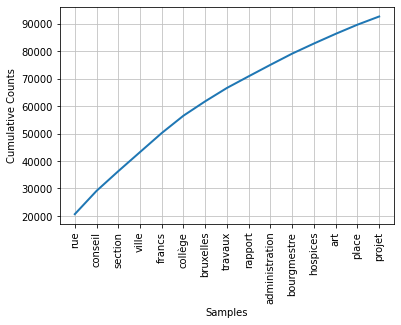

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [198]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Les 15 mots les plus fréquents de la décennie 1860

In [6]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1860s.txt"

with open(path) as f:
    text = f.read()

In [7]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

4351569 words found


In [201]:
words[:10]

['—', 'VILLE', '31', ')', '0', 'DE', '—', 'BRUXELLES', '.', 'BULLETIN']

## Calculer la taille du vocabulaire

In [12]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1251185 words kept (50610 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [13]:
fdist = nltk.FreqDist(kept)
fdist.most_common(15)

[('rue', 17095),
 ('ville', 9071),
 ('conseil', 8451),
 ('collège', 7553),
 ('francs', 6830),
 ('section', 6683),
 ('bourgmestre', 6189),
 ('bruxelles', 5966),
 ('travaux', 5325),
 ('rapport', 4942),
 ('art', 4916),
 ('administration', 4809),
 ('prix', 2853),
 ('hospices', 2764),
 ('demande', 2731)]

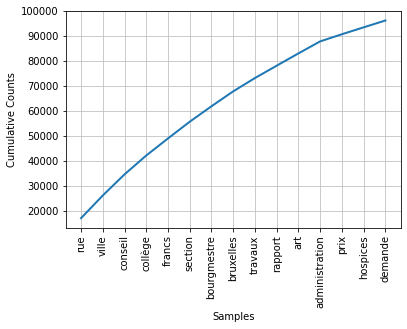

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [204]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Les 15 mots les plus fréquents de la décennie 1870

In [15]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1870s.txt"

with open(path) as f:
    text = f.read()

In [16]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

4398698 words found


In [17]:
words[:10]

['—', 'VILLE', 'D', 'E', 'BULLETIN', '201', '—', 'B', 'R', 'U']

## Calculer la taille du vocabulaire

In [18]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1228939 words kept (48671 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [19]:
fdist = nltk.FreqDist(kept)
fdist.most_common(15)

[('rue', 11035),
 ('ville', 10326),
 ('conseil', 8381),
 ('francs', 8187),
 ('bourgmestre', 7067),
 ('collège', 6773),
 ('bruxelles', 6402),
 ('section', 5714),
 ('art', 5232),
 ('travaux', 4919),
 ('administration', 4134),
 ('rapport', 3637),
 ('messieurs', 3422),
 ('echevin', 3338),
 ('demande', 3224)]

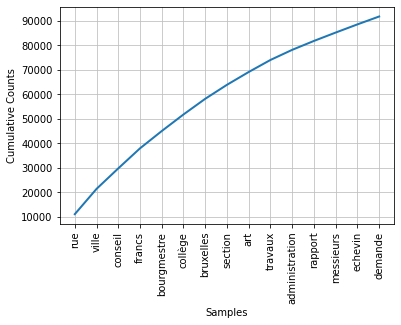

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [210]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Les 15 mots les plus fréquents de la décennie 1880

In [20]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1880s.txt"

with open(path) as f:
    text = f.read()

In [21]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

9269134 words found


In [22]:
words[:10]

['Art', '.', '74', '.', '—', 'Subside', 'à', 'VAthénée', 'royal', ':']

## Calculer la taille du vocabulaire

In [23]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

2401003 words kept (84177 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [24]:
fdist = nltk.FreqDist(kept)
fdist.most_common(15)

[('francs', 21785),
 ('conseil', 17509),
 ('ville', 15843),
 ('rue', 13621),
 ('collège', 13460),
 ('art', 11942),
 ('echevin', 9376),
 ('bruxelles', 8702),
 ('section', 7791),
 ('messieurs', 7521),
 ('service', 7459),
 ('frais', 7379),
 ('question', 7326),
 ('administration', 7316),
 ('travaux', 7278)]

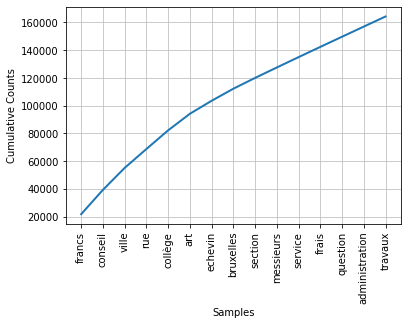

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [216]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Les 15 mots les plus fréquents de la décennie 1890

In [25]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1890s.txt"

with open(path) as f:
    text = f.read()

In [26]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

8692989 words found


In [27]:
words[:10]

['VILLE',
 'DE',
 'JLLETIN',
 'BRUXELLES',
 '.',
 'COMMUNAL',
 'ANNÉE',
 'PREMIERE',
 '1891',
 '.']

## Calculer la taille du vocabulaire

In [28]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

2327175 words kept (70701 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [30]:
fdist = nltk.FreqDist(kept)
fdist.most_common(15)

[('francs', 21576),
 ('rue', 15984),
 ('conseil', 14814),
 ('ville', 12696),
 ('collège', 12421),
 ('art', 10980),
 ('bruxelles', 9328),
 ('frais', 8295),
 ('echevin', 7833),
 ('service', 7815),
 ('dépenses', 7259),
 ('travaux', 7156),
 ('section', 6976),
 ('messieurs', 6610),
 ('bourgmestre', 6509)]

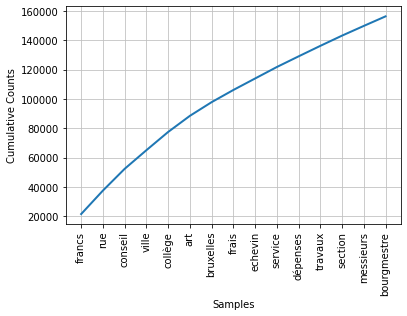

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [222]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Les 15 mots les plus fréquents de la décennie 1900

In [31]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1900s.txt"

with open(path) as f:
    text = f.read()

In [32]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

9979887 words found


In [33]:
words[:10]

['Produit',
 'du',
 'droit',
 'de',
 'fréquent',
 'PUBLICS',
 '142',
 '4869',
 'P',
 'u']

## Calculer la taille du vocabulaire

In [34]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

2090390 words kept (80942 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [35]:
fdist = nltk.FreqDist(kept)
fdist.most_common(15)

[('francs', 21410),
 ('rue', 17588),
 ('ville', 12314),
 ('collège', 11043),
 ('conseil', 10818),
 ('bruxelles', 9983),
 ('art', 9336),
 ('service', 8526),
 ('frais', 8071),
 ('dépenses', 7080),
 ('bourgmestre', 6897),
 ('travaux', 6509),
 ('total', 6420),
 ('recettes', 5930),
 ('budget', 5850)]

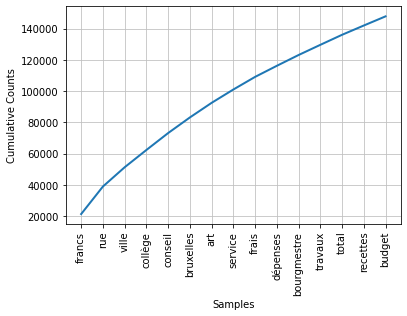

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [228]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Les 15 mots les plus fréquents de la décennie 1910

In [77]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1910s.txt"

with open(path) as f:
    text = f.read()

In [78]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

6941433 words found


In [79]:
words[:10]

['(', '31', 'Janvier', '1910', ')', '—', '100', '—', 'Ces', 'comptes']

## Calculer la taille du vocabulaire

In [80]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1582220 words kept (71203 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [81]:
fdist = nltk.FreqDist(kept)
fdist.most_common(15)

[('francs', 14624),
 ('rue', 12620),
 ('ville', 9390),
 ('conseil', 8336),
 ('bruxelles', 7971),
 ('collège', 7318),
 ('service', 6723),
 ('frais', 5889),
 ('bourgmestre', 5248),
 ('cours', 5196),
 ('travaux', 5074),
 ('dépenses', 5061),
 ('total', 4819),
 ('communal', 4753),
 ('art', 4521)]

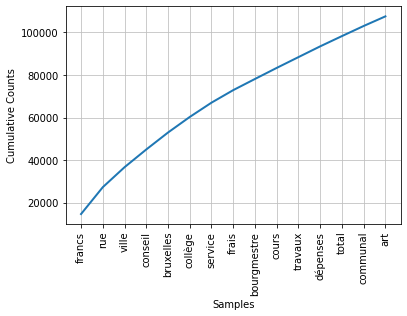

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [234]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Les 15 mots les plus fréquents de la décennie 1920

In [82]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1920s.txt"

with open(path) as f:
    text = f.read()

In [83]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

6941433 words found


In [84]:
words[:10]

['(', '31', 'Janvier', '1910', ')', '—', '100', '—', 'Ces', 'comptes']

## Calculer la taille du vocabulaire

In [85]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1582220 words kept (71203 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [86]:
fdist = nltk.FreqDist(kept)
fdist.most_common(15)

[('francs', 14624),
 ('rue', 12620),
 ('ville', 9390),
 ('conseil', 8336),
 ('bruxelles', 7971),
 ('collège', 7318),
 ('service', 6723),
 ('frais', 5889),
 ('bourgmestre', 5248),
 ('cours', 5196),
 ('travaux', 5074),
 ('dépenses', 5061),
 ('total', 4819),
 ('communal', 4753),
 ('art', 4521)]

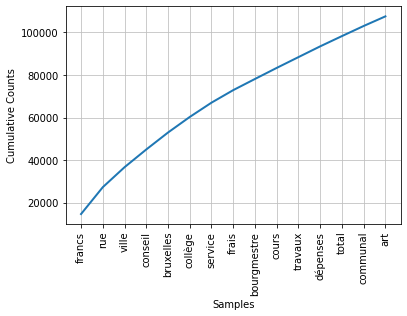

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [240]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Les 15 mots les plus fréquents de la décennie 1930

In [47]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1930s.txt"

with open(path) as f:
    text = f.read()

In [48]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

7863499 words found


In [49]:
words[:10]

['d', "'", 'après', 'des', 'feux', 'par', 'les', 'postes', 'arrivés', 'a']

## Calculer la taille du vocabulaire

In [50]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1903648 words kept (73814 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [53]:
fdist = nltk.FreqDist(kept)
fdist.most_common(20)

[('rue', 14403),
 ('francs', 13416),
 ('ville', 9717),
 ('bruxelles', 9229),
 ('service', 8853),
 ('frais', 7143),
 ('conseil', 6844),
 ('publique', 6793),
 ('collège', 6497),
 ('communal', 6296),
 ('budget', 6223),
 ('recettes', 6103),
 ('travaux', 5789),
 ('bourgmestre', 5622),
 ('echevin', 5596),
 ('entretien', 5591),
 ('art', 5212),
 ('personnel', 5156),
 ('cours', 4982),
 ('ecole', 4934)]

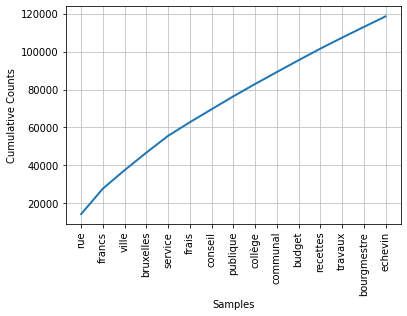

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [246]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Les 15 mots les plus fréquents de la décennie 1940

In [54]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1940s.txt"

with open(path) as f:
    text = f.read()

In [55]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

3552598 words found


In [56]:
words[:10]

['—', '1527', '—', '(', '22', 'novembre', '19', '$)', '1', 'Sapeurs']

## Calculer la taille du vocabulaire

In [57]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

894212 words kept (48831 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [59]:
fdist = nltk.FreqDist(kept)
fdist.most_common(30)

[('conseil', 4691),
 ('publique', 4686),
 ('bruxelles', 4419),
 ('service', 4121),
 ('communal', 4079),
 ('ville', 4015),
 ('rue', 3958),
 ('francs', 3891),
 ('collège', 3539),
 ('travaux', 3254),
 ('personnel', 3171),
 ('bourgmestre', 3104),
 ('ecole', 3025),
 ('taxe', 3023),
 ('budget', 3016),
 ('cours', 2702),
 ('octobre', 2647),
 ('echevin', 2591),
 ('assistance', 2585),
 ('commission', 2565),
 ('membres', 2426),
 ('art', 2293),
 ('question', 2284),
 ('article', 2281),
 ('avis', 2096),
 ('compte', 1947),
 ('messieurs', 1923),
 ('police', 1906),
 ('année', 1851),
 ('administration', 1805)]

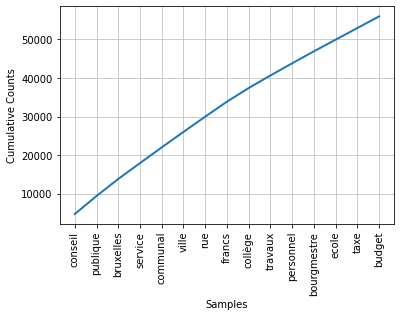

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [261]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Les 15 mots les plus fréquents de la décennie 1950

In [60]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1950s.txt"

with open(path) as f:
    text = f.read()

In [61]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

12382289 words found


In [62]:
words[:10]

['—', '691', '—', '(', '3', 'octobre', '1955', ')', 'Report', ':']

## Calculer la taille du vocabulaire

In [63]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

2804617 words kept (89255 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [65]:
fdist = nltk.FreqDist(kept)
fdist.most_common(30)

[('francs', 18805),
 ('rue', 16090),
 ('publique', 13599),
 ('bruxelles', 12612),
 ('ville', 11896),
 ('travaux', 11718),
 ('conseil', 11381),
 ('communal', 10727),
 ('service', 10726),
 ('bourgmestre', 10429),
 ('budget', 9775),
 ('collège', 9544),
 ('cours', 8908),
 ('question', 8730),
 ('octobre', 8676),
 ('ecole', 8287),
 ('intervention', 8249),
 ('commission', 8122),
 ('personnel', 7979),
 ('article', 7767),
 ('assistance', 7328),
 ('art', 7152),
 ('part', 6686),
 ('membres', 6587),
 ('echevin', 6146),
 ('compte', 6081),
 ('avis', 5988),
 ('année', 5814),
 ('mesdames', 5767),
 ('taxe', 5660)]

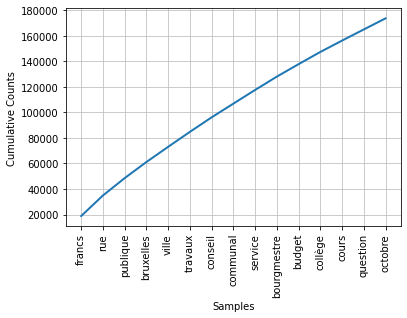

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [267]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Les 15 mots les plus fréquents de la décennie 1960

In [66]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1960s.txt"

with open(path) as f:
    text = f.read()

In [67]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

14929235 words found


In [68]:
words[:10]

['—', '301', '—', '5', '.', '—', 'S', 'e', 'r', 'v']

## Calculer la taille du vocabulaire

In [69]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

3942953 words kept (104653 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [70]:
fdist = nltk.FreqDist(kept)
fdist.most_common(15)

[('francs', 24736),
 ('rue', 18506),
 ('publique', 15980),
 ('budget', 15863),
 ('ville', 15499),
 ('conseil', 14697),
 ('voor', 14274),
 ('bruxelles', 13963),
 ('een', 13946),
 ('communal', 13301),
 ('service', 12960),
 ('article', 12756),
 ('collège', 12367),
 ('travaux', 11966),
 ('art', 11854)]

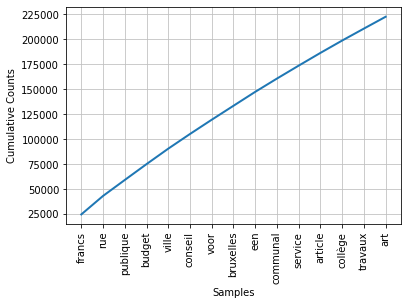

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [273]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Les 15 mots les plus fréquents de la décennie 1970

In [71]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1970s.txt"

with open(path) as f:
    text = f.read()

In [72]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

11947371 words found


In [73]:
words[:10]

['Evaluation', 'du', 'budget', '32', '.', '—', 'Apports', 'de', 'ventes', '33']

## Calculer la taille du vocabulaire

In [74]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

3659552 words kept (102662 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [76]:
fdist = nltk.FreqDist(kept)
fdist.most_common(30)

[('een', 20695),
 ('voor', 20455),
 ('conseil', 19086),
 ('bourgmestre', 14608),
 ('collège', 14438),
 ('rue', 14028),
 ('ville', 13712),
 ('aan', 13710),
 ('bruxelles', 13058),
 ('travaux', 12752),
 ('article', 12294),
 ('echevin', 12166),
 ('communal', 11543),
 ('budget', 11445),
 ('publique', 10323),
 ('die', 10149),
 ('worden', 10040),
 ('dat', 9988),
 ('dépense', 9966),
 ('met', 9882),
 ('door', 9565),
 ('question', 9374),
 ('francs', 9372),
 ('art', 9346),
 ('monsieur', 8702),
 ('deze', 8234),
 ('service', 8218),
 ('compte', 7961),
 ('zijn', 7826),
 ('heer', 7707)]

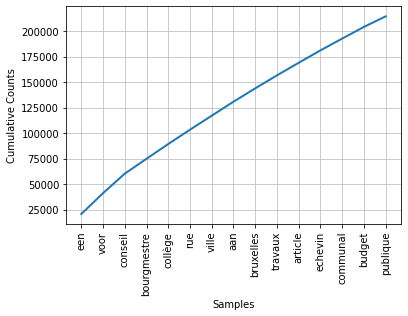

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [279]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

# Graphique final comprenant le résultat de fréquence du terme `art` dans le corpus par décennie

## Graphique 1

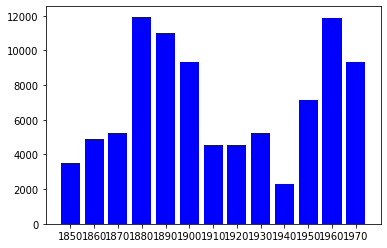

In [108]:
import matplotlib.pyplot as plt

def bar_chart(numbers, labels, pos):
    plt.bar(pos, numbers, color='blue')
    plt.xticks(ticks=pos, labels=labels)
    plt.show()

if __name__ == '__main__':
    numbers = [3528, 4916, 5232, 11942, 10980, 9336, 4521, 4521, 5212, 2293, 7152, 11854, 9346]
    labels = ['1850', '1860', '1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970']
    pos = list(range(13))
    bar_chart(numbers, labels, pos)

## Graphique 2

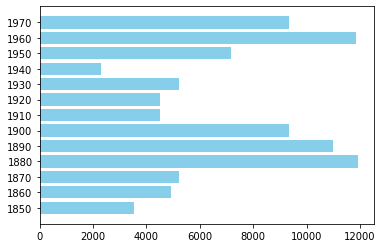

In [93]:
import matplotlib.pyplot as plt
def bar_charth(numbers, labels, pos):
    plt.barh(pos, numbers, color='skyblue')
    plt.yticks(ticks=pos, labels=labels)
    plt.show()
if __name__ == '__main__':
    numbers = [3528, 4916, 5232, 11942, 10980, 9336, 4521, 4521, 5212, 2293, 7152, 11854, 9346]
    labels = ['1850', '1860', '1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970']
    pos = list(range(13))
    bar_charth(numbers, labels, pos)

# Les années 1880 et 1960 comprennent le résultat de fréquence du terme `art` le plus élevé, ils seront donc comparés